# Structure

├─►Data Loading & Initial Inspection <br>
├─► Data Understanding (shape, statistics, datatypes) <br>
├─► Data Cleaning & Preprocessing <br>
├─► Univariate Analysis (distribution of single variables) <br>
├─► Bivariate Analysis (feature vs target) <br>
├─► Multivariate Analysis (interactions between features) <br>
├─► Correlation Analysis <br>

# Data Loading & Initial Inspection

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading DataSet
df = pd.read_csv("C:/Users/jawal/Downloads/Loan_Approval_Dataset.csv")

In [4]:
# DataSet
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Data Understanding (shape, statistics, datatypes)

In [5]:
# Shape of DataSet 
df.shape # (Rows, Columns)

(614, 13)

In [6]:
# Describes Statistical Data from DataSet
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# Information of DataSet (Columns, Null Values, Data Type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data Cleaning & Preprocessing

In [8]:
# Fill null values with values specified 
df.fillna({"Self_Employed": "No", 
           "Gender": "Not defined", 
           "Married": "No",
           "Dependents": 0,
           "LoanAmount": 0, 
           "Loan_Amount_Term": 0, 
           "Credit_History": 0}, inplace = True) # 'inplace = True' used to change the original DataSet after executing the code.

In [9]:
# Checking if any null values still present (Ans - 'No')
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
# Replaced variables "Y" with 1 and "N" with 0 for ease of operations (Column: "Loan_Status") 
df["Loan_Status"] = df["Loan_Status"].map({"Y": 1, "N": 0})

#  Replaced variables "Yes" with 1 and "No" with 0 for further data anlysis (Column: "Self_Employed")
df["Self_Employed"] = df["Self_Employed"].map({"Yes": 1, "No": 0})

In [11]:
# New column named 'TotalIncome'
df["TotalIncome"] = df["ApplicantIncome"] + df["CoapplicantIncome"]

# New column named 'Employed'
df["Employed"] = df["Self_Employed"] != 1

In [12]:
# Replaced variables "True" with 1 and "False" with 0 (Column: "Employed")
df["Employed"] = df["Employed"].map({True: 1, False: 0})

In [13]:
# Rearranging columns
df = df[["Loan_ID", "Gender", "Married", "Dependents", "Education", "Employed", "Self_Employed", "ApplicantIncome",	"CoapplicantIncome", "TotalIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area", "Loan_Status"]]

# New Updated DataSet

In [14]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Employed,Self_Employed,ApplicantIncome,CoapplicantIncome,TotalIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,1,0,5849,0.0,5849.0,0.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,1,0,4583,1508.0,6091.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,0,1,3000,0.0,3000.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,1,0,2583,2358.0,4941.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,1,0,6000,0.0,6000.0,141.0,360.0,1.0,Urban,1


In [15]:
# Shape of DataSet - (Rows, Columns)
df.shape

(614, 15)

Conclusion:
* DataSet preprocessed successfully.
* Filled null values with new relevant ones.
* Created 2 new columns and arranged them in proper order.
* Updated existing values in variables 'Employed', 'Self_Employed', 'Loan_Status' with 1's and 0's for ease to code.
* New DataSet contains 614-Rows and 17-Columns (2 columns added during execution of code below).

# Data Visualization

### Univariate Analysis
### Overall 'Loan Approval Rate' Distribution

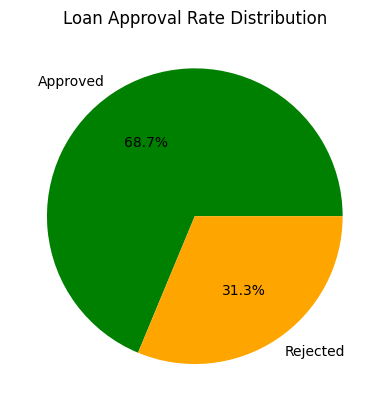

In [16]:
# Pie Chart
loan_count = df["Loan_Status"].value_counts()
pie_chart  = plt.pie(loan_count, labels = ["Approved", "Rejected"], autopct = "%1.1f%%", colors = ["green", "orange"])
plt.title("Loan Approval Rate Distribution")
plt.show()

* 68.7% of loan applications approved (422 out of 614).
* 31.35 of loan applications disapproved (192 out of 614).
* This indicates that more than 2/3rd of loan applications are approved by the financial institution.

### 'Applicant Income Range' Distribution

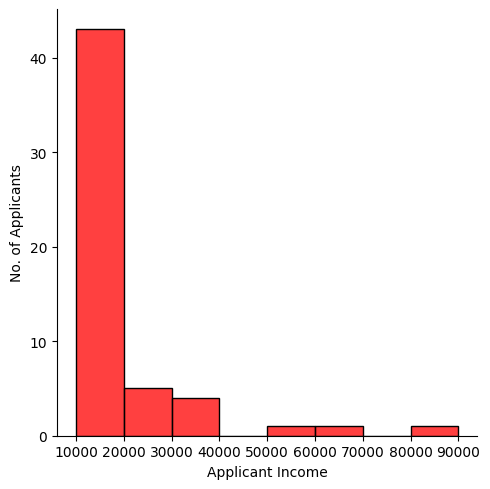

In [17]:
# Histogram
s = sns.displot(df["ApplicantIncome"], bins = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000], color = "r", linewidth = 1, edgecolor = "black")
plt.xlabel("Applicant Income")
plt.ylabel("No. of Applicants")
plt.show()

* The above 'Histogram' shows the highly concentrated 'Applicant Income' in the bracket between (₹10000-₹40000).
* Very few "Applicant Income" exceeded above ₹50000 and a handful of them reached ₹90000 income.

Conclusion: <br>
Applicants in the lower income bracket (₹10000-₹40000) applied for majority of home loan applications whereas a small number of high salaried individuals (₹50000-₹90000) applied for the same.

### 'Co-Applicant Income Range' Distribution

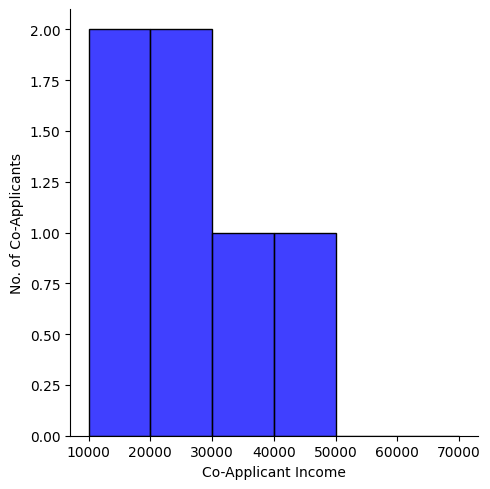

In [18]:
# Histogram
s = sns.displot(df["CoapplicantIncome"], bins = [10000, 20000, 30000, 40000, 50000, 60000, 70000], color = "b", linewidth = 1, edgecolor = "black")
plt.xlabel("Co-Applicant Income")
plt.ylabel("No. of Co-Applicants")
plt.show()

* The above data shows that the majority of 'Co-Applicant' income is in between (₹10000-₹50000) where most of the chunk lies between (₹10000-₹30000).
* No 'Co-Applicant' were a part of lending decisions those include income above (₹50000).

Conclusion:
The income distribution of 'Co-Applicant's those applied for home loans are too concentrated in income ranges between (₹10000-₹50000) and none of them touched income above ₹50000 unlike 'Applicants' those reached income till ₹90000. 

### 'Total Income Range' Distribution

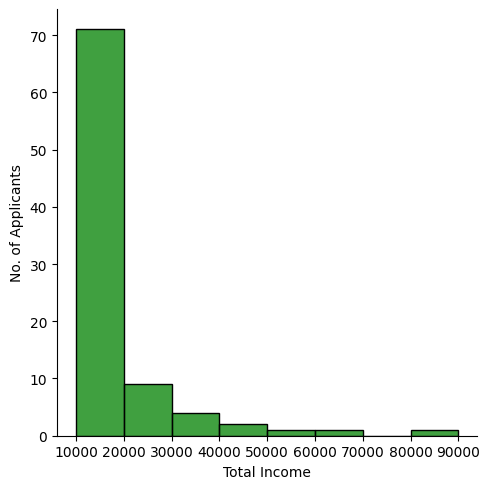

In [19]:
# Histogram
s = sns.displot(df["TotalIncome"], bins = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000], color = "g", linewidth = 1, edgecolor = "black")
plt.xlabel("Total Income")
plt.ylabel("No. of Applicants")
plt.show()

* Since financial institutes prioritize 'Total Income' above 'Individual Income' for lending decisions, considering 'Total Income' for analysis is beneficial.
* Data suggests us that the majority of 'Total Income' ranged from (₹10000-₹40000) those applied for home loans.
* A very few no. of Applicants those ranged between (₹40000-₹90000) participated in lending decisions.

Conclusion:
* The DataSet deals mostly with 'Lower Income Applicants' with (₹10000-₹40000) bracket since these are the ones competed for most of the home loan approvals.
* Applicants with higher income (₹40000-₹90000) dealt with the lowest no. of applications for home loans.
* Hence 'Applicants' thats lies in 'Lower Income' bracket is most crucial for further analysis.

### Different 'Loan Amounts' and their Counts

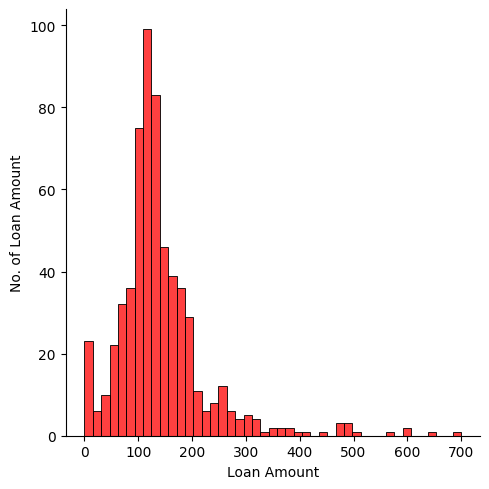

In [20]:
# Histogram
s = sns.displot(x = "LoanAmount", data = df, color = "r")
plt.xlabel("Loan Amount")
plt.ylabel("No. of Loan Amount")
plt.show()

* Above 'Histogram' suggests that the 'Loan Amount' asked ranged from (₹10000-₹700000).
* Nearly 80%-90% of 'Loan Amounts' is highly concentrated between (₹70000-₹200000) that makes this range a deciding factor for getting insights.
* The remaining 10%-20% of amounts spanned towards higher loan amounts suggesting that the data is variable but clear preference given to 'Lower Loan Amounts'.

Conclusion: <br>
The pattern shows that the lending portfolio is dominated by smaller to medium-sized loans while 'Higher Loan Amounts' are significatly less in comparison to lower ones.

### What's the most frequent 'Loan Amount Terms' for Home Loans?

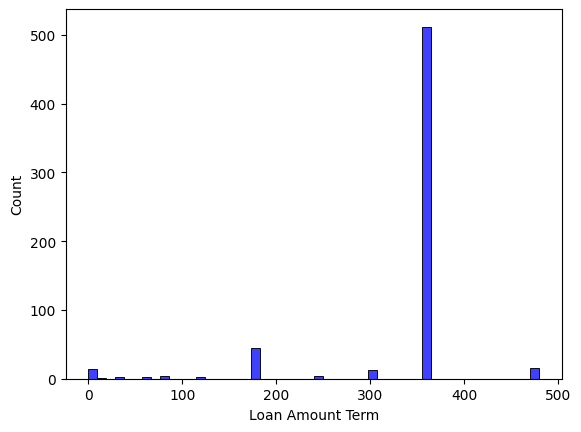

In [21]:
# Histogram
sns.histplot(df["Loan_Amount_Term"], color = "b")
plt.xlabel("Loan Amount Term")
plt.show()

* Data shows that the majority 'Loan Applicants' had 'Loan Amount Term' of '360-months' that makes this a default term length.
* Other 'Loan Amount Term' includes '180-months' and very few of '480-months' that turns these tenures a rare exception.

Conclusion: <br>
The most frequent 'Loan Amount Terms' are the '360-months' plan making this a common choice for the applicants those considering for application of home loans.

### Overall Distribution of 'Credit History'

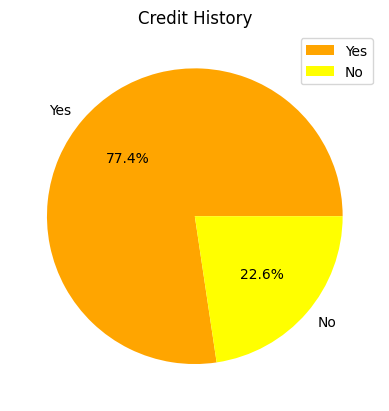

In [22]:
# Pie Chart
credit_count = df["Credit_History"].value_counts()
pc = plt.pie(credit_count, labels = ["Yes", "No"], autopct = "%1.1f%%", colors = ["orange", "yellow"])
plt.title("Credit History")
plt.legend()
plt.show()

Conclusion :
* The pie chart shows that 77.4% of home loan applicants had an existing credit history before applying – nearly three‑quarters of all applicants.
* The remaining 22.6% of applicants did not have any prior credit history, representing roughly one‑quarter of the applicant base.
* Since a clear majority of applicants have prior credit history, it is important to analyze how the presence or absence of credit history influences loan approval decisions.

### 'Property Area' and it's contribution for 'Home Loan Approval'

In [23]:
# Created a new variable 'Property_Area_Mapped' for ease of operation
df = df.copy()
df["Property_Area_Mapped"] = df["Property_Area"].map({"Urban": 2, "Semiurban": 1, "Rural": 0})
a = df["Property_Area_Mapped"].value_counts()

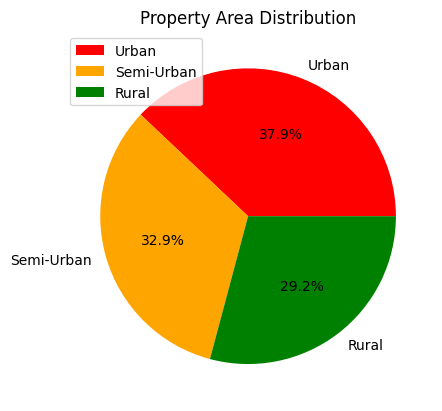

In [24]:
# Pie Chart
plt.pie(a, labels = ["Urban", "Semi-Urban", "Rural"], autopct = "%1.1f%%", colors = ["red", "orange", "green"])
plt.title("Property Area Distribution")
plt.legend()
plt.show()

* Urban properties account for the largest share of home loan applications in the dataset, with 37.9% of the total.
* Semi-Urban properties represent the second largest segment, making up 32.9% of all applications.
* Rural properties comprise the smallest share, contributing only 29.2% of applications to financial institutions.

Conclusion:
* The predominance of Urban and Semi-Urban property applications suggests that these areas should be prioritized in future data analysis and strategy development.
* Rural property applications are the least frequent, indicating comparatively lower demand in non-urban sectors, but still represent a significant segment worth monitoring.

# Bivariate Analysis

### Impact of 'Education' on 'Loan Approval'

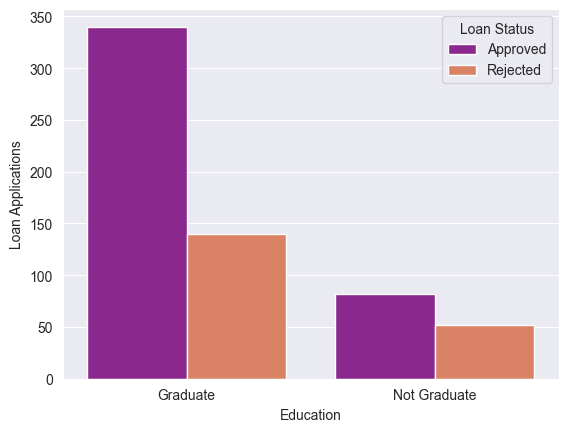

In [25]:
# Count Plot
sns.set_style("darkgrid")
s = sns.countplot(x = "Education", data = df, hue ="Loan_Status", hue_order = [1, 0], palette = "plasma")
s.set_ylabel("Loan Applications")
s.legend(labels = ["Approved", "Rejected"], title = "Loan Status")
plt.show()

Graduate:
* Around 340 graduates were given loan by the financial institute (71% of graduates).
* Approximately 140 graduates were declined for financial aid by institution (29% of graduates).

Non-Graduate:
* Almost 80 applicants were favoured for the loan (61% of non-graduates).
* Exact 50 non-graduates were rejected for loan (39% of non-graduates).

Conclusion:
* Though the number of 'Non-Graduates' were comparatively lower than 'Graduates', the later one suceeded with 10% more loan approval rate.
* Rate of rejections for home loans faced by 'Non-Graduates' were 10% more than of 'Graduates.
* The above 'Count Plot' clearly states that the 'Graduates' were favoured above 'Non-Graduates' for home loan approval by the financial institute.

### 'Employed' vs 'Self-Employed' for Home Loan Approval

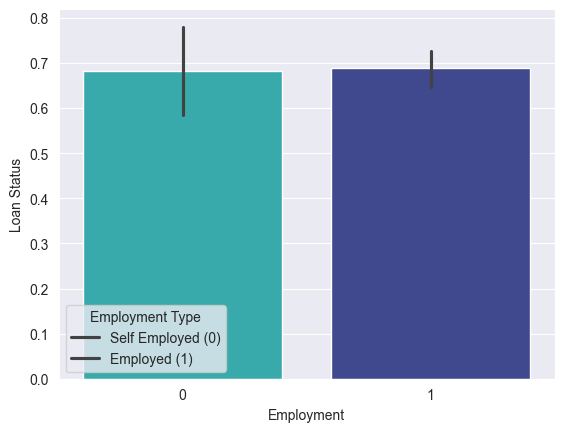

In [26]:
# Bar Plot
s = sns.barplot(x = "Employed", y = "Loan_Status", hue = "Self_Employed", data = df, palette = "mako", saturation = 1)
s.legend(labels = ["Self Employed (0)", "Employed (1)"], title = "Employment Type")
s.set_xlabel("Employment")
s.set_ylabel("Loan Status")
plt.show()

Home Loan Approval by Employment Status: <br><br>
Self-Employed: <br> 
Achieved a 78% success rate in securing home loan approvals from financial institutions. <br><br>
Employed (Salaried): <br>
Received approvals for 79% of home loan applications—a marginally higher rate compared to self-employed applicants.

Conclusion: <br>
* Despite the difference in income patterns (fixed for salaried, variable for self-employed), both groups enjoyed nearly equal chances of loan approval. <br>
* This suggests that lending decisions prioritize overall eligibility and financial health, rather than strictly differentiating by employment type.

### Relationship between 'Applicant Income' and 'Loan Approval'

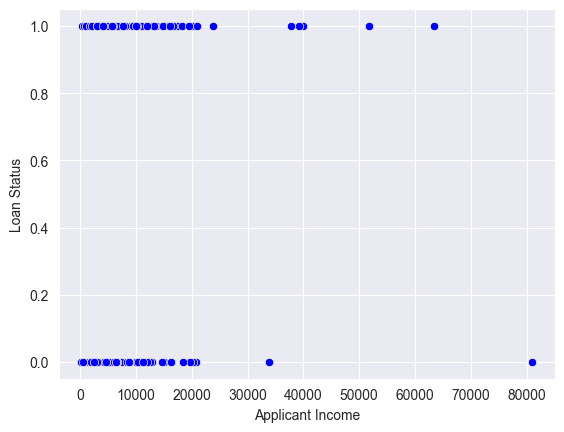

In [27]:
# Scatter Plot
s = sns.scatterplot(x = "ApplicantIncome", y = "Loan_Status", data = df, color = "b")
s.set_xlabel("Applicant Income")
s.set_ylabel("Loan Status")
plt.show()

### Relationship between 'Co-Applicant Income' and 'Loan Approval'

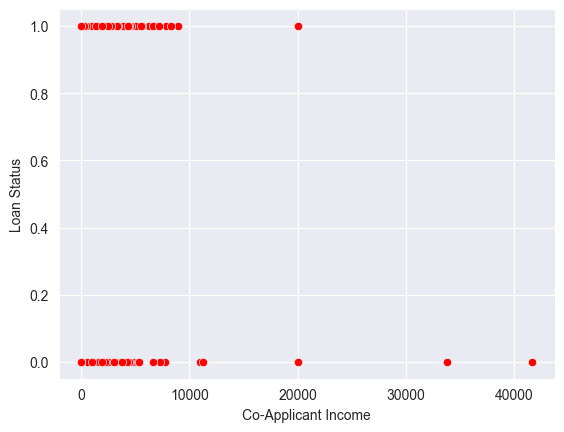

In [28]:
# Scatter Plot
s = sns.scatterplot(x = "CoapplicantIncome", y = "Loan_Status", data = df, color = "r")
s.set_xlabel("Co-Applicant Income")
s.set_ylabel("Loan Status")
plt.show()

### Relationship between 'Total Income' and 'Loan Approval'

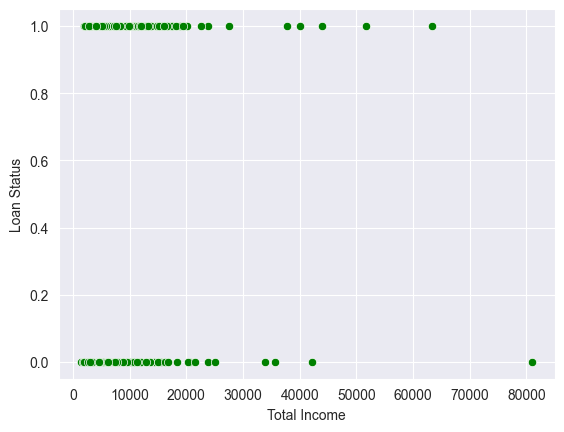

In [29]:
# Scatter Plot
s = sns.scatterplot(x = "TotalIncome", y = "Loan_Status", data = df, color = "g")
s.set_xlabel("Total Income")
s.set_ylabel("Loan Status")
plt.show()

Comparing relationships between:
1. 'Applicant Income' and 'Loan Approval': <br>
Applicant's income from (₹0-₹20000) enjoyed the most loan approval but plot shows almost equal no. of loan rejected for applicants with same income. <br><br>
2. 'Co-Applicant Income' and 'Loan Approval': <br>
Co-Applicant's income from (₹0-₹10000) rewarded with majority of loan approval with identical no. of people declined for the same. <br><br>
3. 'Total Income' and 'Loan Approval': <br>
Total income from (₹10000-₹25000) shows the perfect segment of income for loan approval but also showed the most rejections for loan from the financial institute.

(Incomes apart from above income ranges were insignificant to draw any conclusion.) <br>
Conclusion: <br>
Plots shows that there's no significant difference on loan approval/disapproval based solely on income of 'Applicant', 'Co-Applicant' and 'Their combined income'.


### Is 'Credit History' Crucial for 'Loan Approval'?

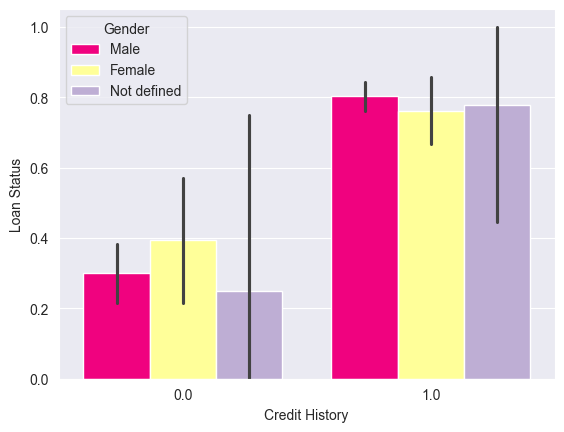

In [30]:
# Bar Plot
s = sns.barplot(x = "Credit_History", y = "Loan_Status", data = df, hue = "Gender", palette = "Accent_r", saturation = 1)
s.set_xlabel("Credit History")
s.set_ylabel("Loan Status")
plt.show()

With Credit History:
* 80% of males with a credit history were approved for home loans.
* Almost 80% of females in the same category received loan approval from financial institutions.

No Credit History:
* Approval rates for males dropped sharply to just 30%.
* Females performed better than males in this group, with 40% of loan applications approved.

Other Notes: <br>
Applicants with gender marked as "Not Defined" had negligible representation in the dataset and were excluded from the analysis.

Conclusion:
* Financial institutions did not display a gender bias in home loan sanctioning, with both males and females having comparable opportunities for approval when credit history was considered.
* The analysis shows that credit history is a major determinant of loan approval, as applicants with previous credit history, regardless of gender had significantly higher approval rates compared to those without.

### Connection between 'Loan Amount' and 'Loan Approval Rate'

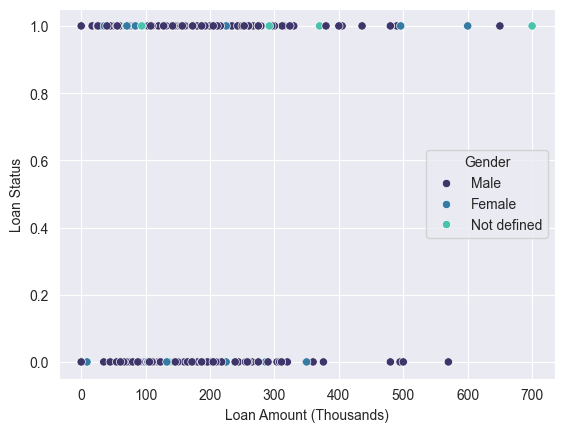

In [31]:
# Scatter Plot
s = sns.scatterplot(x = "LoanAmount", y = "Loan_Status", data = df, hue = "Gender", palette = "mako")
s.set_xlabel("Loan Amount (Thousands)")
s.set_ylabel("Loan Status")
plt.show()

* The above 'Scatter Plot' suggests that the majority of loan applications ranged from ₹25000-₹350000 (Some exceeding till ₹7Lakhs).
* Male applications demanded loan that ranged from (₹20000-₹350000) and some urged even higher for above ₹4Lakhs.
* Females applied loans for low amount that varied between (₹10000-₹220000).

Conclusion:
* Most applicants got approved and many got rejected for loan amount ranged between ₹25000-₹350000 irrespective of their gender.
* Many applications for loan amount above ₹350000 were accepted and some were declined following previous pattern.
* The above plot demonstrated that there's no connection between 'Loan Amount' and 'Approval Rate' and there are other factors that influenced lending decisions.

### 'Loan Term' vs 'Loan Approval Rate'

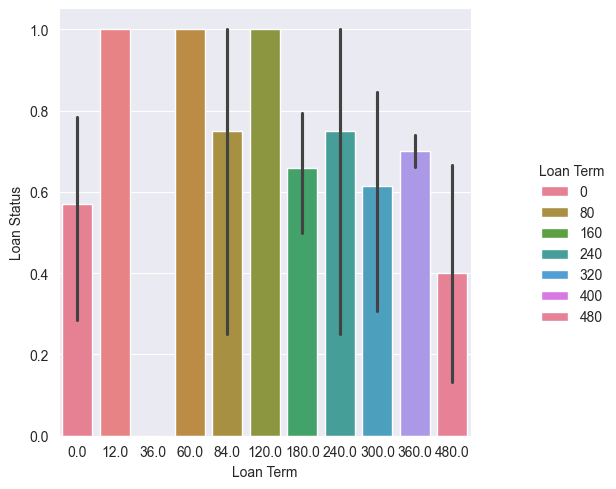

In [32]:
# Cat Plot
s = sns.catplot(x = "Loan_Amount_Term", y = "Loan_Status", data = df, kind ="bar", hue="Loan_Amount_Term", palette = "husl")
s.set_xlabels("Loan Term")
s.set_ylabels("Loan Status")
s.legend.set_title("Loan Term")
plt.show()

Loan Terms - <br>
12 Months of tenure - 100% success rate <br>
36 Months of tenure - 0% success rate <br>
60 Months of tenure - 100% success rate <br>
84 Months of tenure - More than 70% success rate <br>
120 Months of tenure - 100% success rate <br>
180 Months of tenure - More than 60% success rate <br>
240 Months of tenure - More than 70% success rate <br>
300 Months of tenure - Almost 60% success rate <br>
360 Months of tenure - 70% success rate <br>
480 Months of tenure - 40% success rate <br>
(0 Months of tenure is insignificant hence not considered for analysis) <br>

Conclusion: <br>
* Applicants those demanded loan tenure of '12 Months', '60 Months' and '120 Months' received astonishing 100% home loan from the financial institute. <br>
* Loan tenure of '84 Months', '240 Months' and '360 Months' succeeded by receiving about 70% of home loans. <br>
* '180 Months' and '300 Months' bracket got accepted with about 60% success rate for home loans. <br>
* Above 'Cat Plot' proves that the smaller 'Loan Tenures' received the highest rate (Reaching even 100%) of home loans whereas larger 'Loan Tenures' struggled from range between 60-70% of home loan approvals. <br>
* This suggests us that the financial institute favoured lower 'Loan Tenures' over larger 'Loan Tenures' by avoiding risks and choosing reliable short term home loan applicants.

Disclaimer: The dataset contains too few records for shorter loan tenures, so any conclusion about it would be unreliable and potentially misleading

### 'Property Area' vs 'Loan Approval Rates'

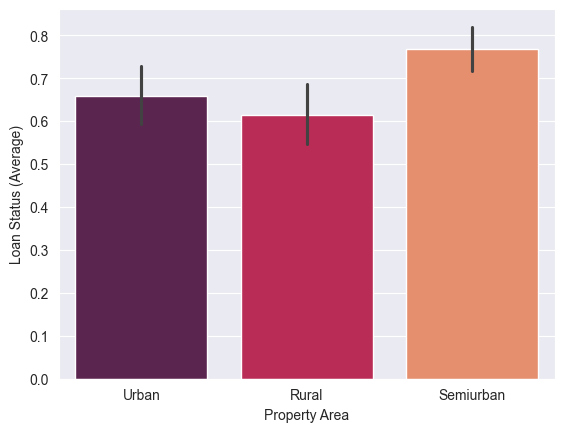

In [33]:
# Bar Plot
s = sns.barplot(x = "Property_Area", y = "Loan_Status", data = df, hue = "Property_Area", palette = "rocket", saturation = 0.8)
s.set_xlabel("Property Area")
s.set_ylabel("Loan Status (Average)")
plt.show()

Loan Approval Rates by Property Area: <br>
* Urban Area: Around 66% of applicants seeking home loans for urban properties received approval from financial institutions. <br>
* Rural Area: Only 61% of loan applications for rural properties were approved, the lowest success rate among all areas. <br>
* Semiurban Area: Semiurban properties saw the highest approval rate, with about 77% of applicants receiving home loan sanctions.

Conclusion:
* Properties located in rural areas faced the lowest approval rates from financial institutions.
* Urban property applications had a moderate approval rate, indicating a fair but not leading preference.
* Semiurban properties were favored the most, with the highest success rate for home loan approvals, making them the top choice for lenders in this dataset.
* These trends suggest that financial institutions may perceive semiurban areas as having a lower risk profile or greater growth potential compared to rural and urban sectors, driving more positive lending decisions towards them.

# Multivariate Analysis

### 'Gender' vs 'Marriage Status' vs 'Loan Approval Rate'

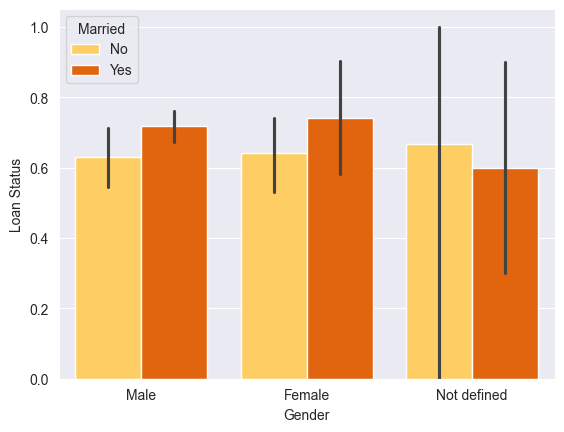

In [34]:
# Barplot
s = sns.barplot(x = "Gender", y = "Loan_Status", data = df, hue = "Married", palette = "YlOrBr", saturation = 1)
s.set_ylabel("Loan Status")
plt.show()

* Married individuals shows consistently higher chances in loan approval rate (70% of approval rate) compared to unmarried individuals (63% of approval rate).
* The Loan Status values are consistent across both the genders with slight variation in them. This suggests that genders may not be a primary factor influencing loan status.
* The positive relationship between being married and higher loan approval rate remains stable regardless of gender classification, suggesting marital status could be a significant predictor of loan status.

Conclusion: <br>
Marital status appears to be a more influential factor than gender in determining loan status, with married individuals showing consistently higher loan status across all gender categories. <br>
The Not Defined bar does not match with other two graphs suggesting insignificant data for this variable in the dataset hence is not considered for analysis.

### Which 'Income-to-Loan' Ratio do Approved/Rejected Applicants typically have?

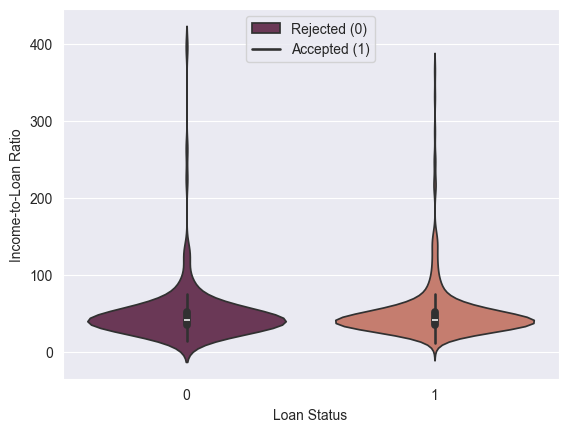

In [35]:
# Violin Plot 
df = df.copy()
df["d"] = df["TotalIncome"] / df["LoanAmount"]
s = sns.violinplot(x = "Loan_Status", y = "d", data =  df, hue = "Loan_Status", palette = "rocket", saturation = 0.5)
s.set_xlabel("Loan Status")
s.set_ylabel("Income-to-Loan Ratio")
s.legend(labels = ["Rejected (0)", "Accepted (1)"])
plt.show()

Accepted Applicants: <br>
The 'Income-to-Loan Ratio' for majority of 'Accepted Applicants' ranged from (20-60) where higher ratios succeeded the most for approval of home loans. <br><br>
Rejected Applicants: <br>
The 'Rejected Applicants' with 'Income-to-Loan Ratio' from (20-60) sufferered the most for home loans where lower ratios struggled even more. <br>

Conclusion: <br>
* Majority of 'Accepted' and 'Rejected' applicants had 'Income-to-Loan Ratio' of (20-60). <br>
* Above 'Violin Plot' suggests us that the financial institute don't distinct applicants solely on the basis of general 'Income-to-Loan Ratio' and favours other factors for their lending decisions. <br>
* Hence analysis between 'Income-To-Loan' ratio and it's consequences on home loan approval is insignificant.

### Analysis of various Factors and Connections between them

[]

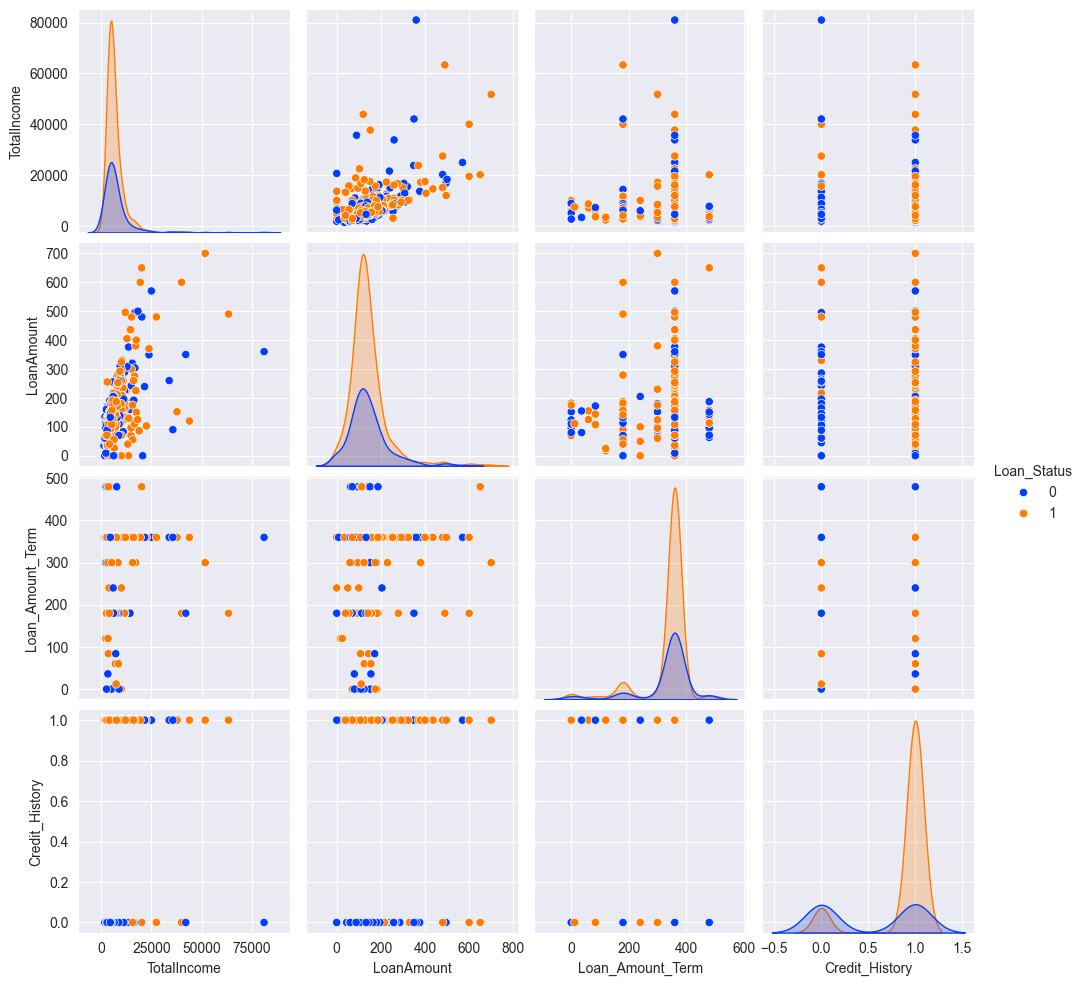

In [36]:
# Pairplot
sns.pairplot(df, vars = ["TotalIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"], y_vars = "Loan_Status", hue = "Loan_Status", palette = "bright")
plt.plot()

Diagonal Plots:
* TotalIncome - Higher income created better chances for approval of home loan.
* LoanAmount - Applying for higher loan amounts provided positive results for applicants.
* Loan_Amount_Term - Demanding longer tenure for home loan is favoured by financial institute.
* Credit_History - Applicants with a positive credit history purely dominates the chances for getting a home loan.

TotalIncome vs LoanAmount: <br>
Majority of applicants with a Family Income under '₹25000' and those applying for Loan Amount below 4 Lakhs are the ideal candidates for loan approval.

TotalIncome vs Loan_Amount_Term: <br>
Data is scattered while majority approvals came from 360 months of loan tenure.

TotalIncome vs Credit_History: <br>
Applicants with previous credit history succedded despite of variable income ranges in this data.

Loan_Amount vs Loan_Amount_Term: <br>
Loan tenure below 12 months or above 400 months causes serious issues while getting approval for loan despite any Loan Amount being asked.

Loan_Amount vs Credit_History: <br>
Applicants with no credit history is neglected by loan providers as discussed above.

Key Takeaways:
* Credit History is always a crucial factor in lending decisions.
* Financial institutes favours applications for higher Loan Amounts and Loan Tenure since more money comes this way from the applicants.
* Higher Income is a plus when it comes to loan approvals.
* Loan Tenure of 360 months is a standard loan term offered. 

('Loan_Amount_Term vs Loan_Amount' and 'Loan_Amount_Term vs Credit_History' are ignored since above data is insufficient to conclude any relation between them.)


# Correlation Analysis

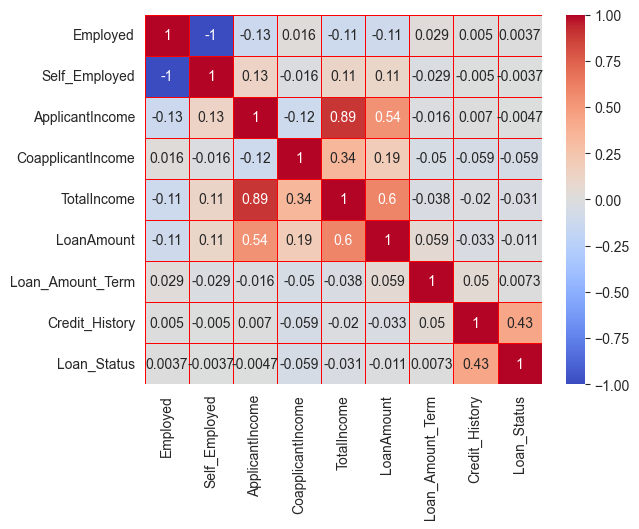

In [37]:
# Heatmap
numerical_cols = ['Employed', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'TotalIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']

# Create dataframe with only numerical data
df_numerical = df[numerical_cols].corr()
# 'corr()' - Calculates correlation between all pairs of columns

sns.heatmap(df_numerical, annot = True, cmap='coolwarm', linewidth = 0.5, linecolor = "r")
plt.show()

Strong Positive Correlations:
* Total Income and Applicant Income: Highest correlation at 0.89, reflecting that applicant income forms the bulk of total household income.
* Total Income and Loan Amount: Moderate correlation (0.6), indicating that applicants with higher total income tend to secure larger loans; the correlation between applicant income and loan amount (0.54) supports this trend.
* Credit History and Loan Status: Considerable positive correlation (0.43), confirming that applicants with an established credit history are favoured in lending decisions by financial institutions.

Strong Negative Correlation
* Employment Types: 'Employed' and 'Self-Employed' categories are perfectly negatively correlated (-1), as they are mutually exclusive.

Weak Positive Correlations
* Co-Applicant Income and Total Income: Weak correlation (0.34), signaling a minor but present contribution of co-applicant income to total income.
* Loan Amount and Co-Applicant Income: Very weak positive correlation (0.19), suggesting nearly negligible influence of co-applicant income on approved loan amount.

Weak Negative Correlations
* Income Factors and Loan Status: Applicant income, co-applicant income, and total income have very weak negative correlation with loan status (near zero), demonstrating that income levels alone do not significantly impact loan approval outcomes.

Approval priorities: <br>
Lenders are more likely to make their decisions on financial health—especially credit history—rather than relying simply on income sources.

Other Findings: <br>
Correlations among other variable pairs are either weak or close to zero and thus statistically insignificant.

Overall, lenders prioritize credit history and financial health much more than income alone when granting home loans, while most income-related variables mainly affect the loan amount